# **Advanced Machine Learning**

Yurag, Marivient Alexia R.

BSCS - IS - 3B

March 27, 2024

Assessment 8

**Assessment Task: Pollution Data Time Series Analysis Using ARIMA**

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

**1. Dataset Preparation**

In [ ]:
#Load the Dataset

df = pd.read_csv('most-polluted-countries.csv')
#statistics = df.describe()
df.head()
#print(statistics)

,pollution_2023,pollution_growth_Rate,country_name,ccn3,country_region,united_nation_Member,country_land_Area_in_Km,pollution_density_in_km,pollution_density_per_Mile,share_borders,pollution_Rank,mostPollutedCountries_particlePollution
0,1428627663,0.00808,India,356,Asia,True,2973190.0,480.5033,1244.5036,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",1,58.08
1,1425671352,-0.00015,China,156,Asia,True,9424702.9,151.2696,391.7884,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",2,39.12
2,339996563,0.00505,United States,840,North America,True,9147420.0,37.1686,96.2666,"CAN, MEX",3,9.04
3,277534122,0.00738,Indonesia,360,Asia,True,1877519.0,147.8196,382.8528,"TLS, MYS, PNG",4,51.71
4,240485658,0.01976,Pakistan,586,Asia,True,770880.0,311.9625,807.9829,"AFG, CHN, IND, IRN",5,65.81


In [ ]:
# Extract relevant columns
pollution_2023 = df['pollution_2023']
pollution_growth_rate = df['pollution_growth_Rate']

# Generate time index (in this case, we'll use country indices)
time_index = np.arange(len(df))

# Simulate trend: pollution in 2023 + growth rate * time_index
trend = pollution_2023 + pollution_growth_rate * time_index

# Plot the simulated trend
plt.figure(figsize=(10, 6))
plt.plot(time_index, trend, label='Simulated Trend')
plt.title('Simulated Trend of Pollution Levels Over Time')
plt.xlabel('Country Index')
plt.ylabel('Pollution Level in 2023')
plt.legend()
plt.grid(True)
plt.show()

**2.Stationarity Testing**

In [ ]:
# Extract the pollution data for the year 2023 (assuming it's in the 'pollution_2023' column)
pollution_data = df['pollution_2023']

# Perform Augmented Dickey-Fuller test
result = adfuller(pollution_data)

# Print the test result
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.300734202893016
p-value: 0.01484568748394119
Critical Values:
   1%: -3.5117123057187376
   5%: -2.8970475206326833
   10%: -2.5857126912469153


A p-value of less than the chosen significance level (e.g., 0.05) indicates evidence against the null hypothesis of non-stationarity in the case of the Augmented Dickey-Fuller (ADF) test. This suggests that the time series data is probably steady, which makes it appropriate for use in a variety of time series analysis methods, including modeling and forecasting. But if the p-value exceeds the significance level, it is possible that the data are non-stationary, in which instance more transformations or differencing will be necessary to address trends or seasonality before executing a useful analysis.

**3.ARIMA Model Identification**

In [ ]:
# Plot ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(pollution_data, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(pollution_data, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

An ARIMA model's parameter selection (p, d, q) depends on determining the autocorrelation structure of the time series data. The partial autocorrelation function (PACF), which shows how many delayed terms are in the autoregressive (AR) component, has important peaks that influence the parameter p. Based on how many differencing operations are required to achieve stationarity, the parameter d is chosen. Significant peaks in the autocorrelation function (ACF), which show how many delayed terms are in the moving average (MA) component, determine the parameter q.

**4. ARIMA Model Fitting**

In [ ]:
# Define the identified parameters (p, d, q)
# AR parameter
p = 1
# Differencing parameter
d = 1
# MA parameter
q = 1

# Fit the ARIMA model
model = ARIMA(pollution_data, order=(p, d, q))
fit_model = model.fit()

# Print model summary
print(fit_model.summary())

In [ ]:
# Generate model residuals
residuals = fit_model.resid

# Plot ACF and PACF of residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.subplot(2, 1, 2)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.tight_layout()
plt.show()

# Evaluate model performance
mse = mean_squared_error(pollution_data, fit_model.predict())
print(f'Mean Squared Error (MSE): {mse}')


**5. Forecasting**

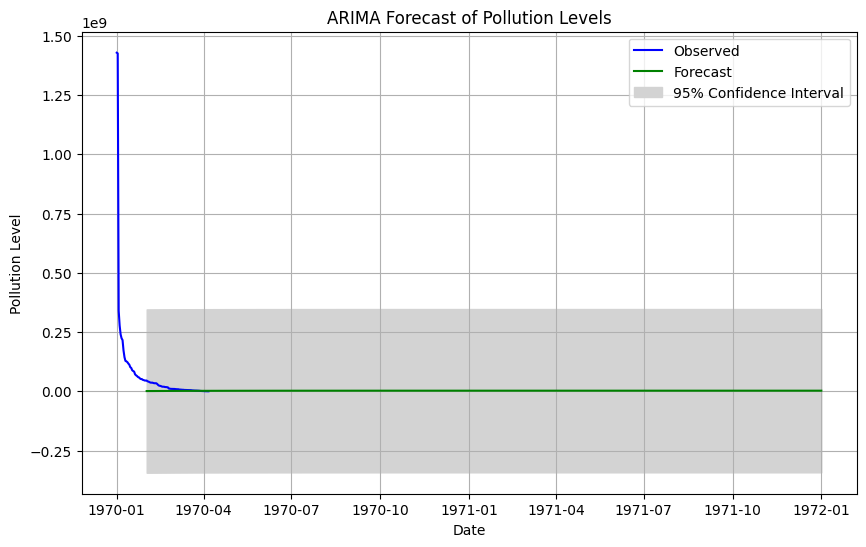

In [ ]:
# Forecast next 2 years (24 months)
forecast_results = fit_model.forecast(steps=24)

# Extract forecast values
forecast_values = forecast_results

# Get the residuals from the model
residuals = fit_model.resid

# Calculate the residual standard deviation
residual_std = np.std(residuals)

# Construct confidence intervals
z_critical = 1.96  # 95% confidence interval
forecast_se = residual_std  # Using residual standard deviation as standard error
forecast_ci_lower = forecast_values - z_critical * forecast_se
forecast_ci_upper = forecast_values + z_critical * forecast_se

# Generate dates for the forecast period
last_observation_date = pollution_data.index[-1]
forecast_dates = pd.date_range(start=last_observation_date, periods=25, freq='MS')[1:]

# Plot the forecast along with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(pollution_data.index, pollution_data, label='Observed', color='blue')
plt.plot(forecast_dates, forecast_values, color='green', label='Forecast')
plt.fill_between(forecast_dates, forecast_ci_lower, forecast_ci_upper, color='lightgray', label='95% Confidence Interval')
plt.title('ARIMA Forecast of Pollution Levels')
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()